# 自编码器
#### https://www.zhihu.com/question/41490383

## 一、自编码器简介
&emsp;&emsp;先不谈神经网络、深度学习、仅是自编器的的话，其原理很简单。自编码器可以理解为一个试图去还原始输入的系统。如下图所示：

<img src="f5ccfacef17d59e106b012af8676d3b5_hd.jpg" width = "60%"/>

&emsp;&emsp;图中，虚线蓝色框内就是一个自编码器模型，它由编码器（Encoder）和解码器（Decoder）两部分组成，本质上都是对输入信号做某种变换。编码器将输入信号$x$变换成编码信号$y$，然后解码器将编码$y$转化成输出信息$\widetilde{x}$。即
$$y = f(x)\\ \widetilde{x} = g(y) = g(f(x))$$

&emsp;&emsp;自编码器的目的是，让输出$\widetilde{x}$尽可能复现输入$x$，即“Tries to copy its input to its output”。但是如果一个自编码器只是简单地学会$g(f(x)) = x$，也就是恒有$x = \widetilde{x}$，那么这个编码器并没有什么特别的用处（并无卵用）。相反，我们不应该将自编码器设计成输入到输出完全相等。这通常需要向自编码器加一些约束，是它只能近似地复制，并只能复制与训练数据相似的输入。这些约束强制模型考虑输入数据的哪些部分需要被优秀复制，因此它往往能学习到数据的有用特性。

&emsp;&emsp;对于自编码器，我们往往并不关心输出是什么（反正只是复现输入）,我们真正关心的是中间层的编码，或者说是从输入到编码的映射。可以这么想，在我们强迫编码$y$和输入$x$不同的情况下，系统还能够去复原原始信号$x$,那么说明编码$y$已经承载了原始数据的所有信息，但以一种不同的形式 —— 这就是特征提取，而且是自动学出来的。实际上，自动学习原始特征表达也是神经网络和深度学习的核心目的之一。

<img src='AE.jpg' />

自动编码器是一种数据的压缩算法，其中数据的压缩和解压缩函数是数据相关的、有损的、从样本中自动学习的。在大部分提到自动编码器的场合，压缩和解压缩的函数是通过神经网络实现的。

1）自动编码器是数据相关的（data-specific 或 data-dependent），这意味着自动编码器只能压缩那些与训练数据类似的数据。比如，使用人脸训练出来的自动编码器在压缩别的图片，比如树木时性能很差，因为它学习到的特征是与人脸相关的。

2）自动编码器是有损的，意思是解压缩的输出与原来的输入相比是退化的，MP3，JPEG等压缩算法也是如此。这与无损压缩算法不同。

3）自动编码器是从数据样本中自动学习的，这意味着很容易对指定类的输入训练出一种特定的编码器，而不需要完成任何新工作。

搭建一个自动编码器需要完成下面三样工作：搭建编码器，搭建解码器，设定一个损失函数，用以衡量由于压缩而损失掉的信息。编码器和解码器一般都是参数化的方程，并关于损失函数可导，典型情况是使用神经网络。编码器和解码器的参数可以通过最小化损失函数而优化，例如SGD。

自编码器是一个自监督的算法，并不是一个无监督算法。自监督学习是监督学习的一个实例，其标签产生自输入数据。要获得一个自监督的模型，你需要一个靠谱的目标跟一个损失函数，仅仅把目标设定为重构输入可能不是正确的选项。基本上，要求模型在像素级上精确重构输入不是机器学习的兴趣所在，学习到高级的抽象特征才是。事实上，当主要任务是分类、定位之类的任务时，那些对这类任务而言的最好的特征基本上都是重构输入时的最差的那种特征。

目前自编码器的应用主要有两个方面，第一是数据去噪，第二是为进行可视化而降维。配合适当的维度和稀疏约束，自编码器可以学习到比PCA等技术更有意思的数据投影。

对于2D的数据可视化，t-SNE（读作tee-snee）或许是目前最好的算法，但通常还是需要原数据的维度相对低一些。所以，可视化高维数据的一个好办法是首先使用自编码器将维度降低到较低的水平（如32维），然后再使用t-SNE将其投影在2D平面上。

## 二、几种编码器
自编码器（autoencoder）是神经网络的一种，经过训练后能尝试将输入复制到输出。自编码器（autoencoder）内部有一个隐藏层 $h$，可以产生编码（code）表示输入。该网络可以看作由两部分组成：一个由函数 $h = f(x)$ 表示的编码器和一个生成重构的解码器 $r = g(h)$。如果一个自编码器只是简单地学会将处处设置为 $g(f(x)) = x$，那么这个自编码器就没什么特别的用处。相反，我们不应该将自编码器设计成输入到输出完全相等。这通常需要向自编码器强加一些约束，使它只能近似地复制，并只能复制与训练数据相似的输入。这些约束强制模型考虑输入数据的哪些部分需要被优先复制，因此它往往能学习到数据的有用特性。

### 1. 欠完备自编码器
从自编码器获得有用特征的一种方法是限制 $h$ 的维度比 $x$ 小，这种编码维度小于输入维度的自编码器称为欠完备（undercomplete）自编码器。学习欠完备的表示将强制自编码器捕捉训练数据中最显著的特征。

学习过程可以简单地描述为最小化一个损失函数 $L(x,g(f(x)))$，其中 $L$ 是一个损失函数，惩罚$g(f(x))$ 与 $x$ 的差异，如均方误差。当解码器是线性的且 $L$ 是均方误差，欠完备的自编码器会学习出与 PCA 相同的生成子空间。这种情况下，自编码器在训练来执行复制任务的同时学到了训据的主元子空间。如果编码器和解码器被赋予过大的容量，自编码器会执行复制任务而捕捉不到任何有关数据分布的有用信息。

### 2.  正则自编码器
正则自编码器使用的损失函数可以鼓励模型学习其他特性（除了将输入复制到输出），而不必限制使用浅层的编码器和解码器以及小的编码维数来限制模型的容量。这些特性包括稀疏表示、表示的小导数、以及对噪声或输入缺失的鲁棒性。即使模型容量大到足以学习一个无意义的恒等函数，非线性且过完备的正则自编码器仍然能够从数据中学到一些关于数据分布的有用信息。

#### 2.1 稀疏自编码器
稀疏自编码器简单地在训练时结合编码层的稀疏惩罚 $Ω(h)$ 和重构误差：$L(x,g(f(x))) + Ω(h)$，其中 $g(h)$ 是解码器的输出，通常 $h$ 是编码器的输出，即 $h = f(x)$。稀疏自编码器一般用来学习特征，以便用于像分类这样的任务。稀疏正则化的自编码器必须反映训练数据集的独特统计特征，而不是简单地充当恒等函数。以这种方式训练，执行附带稀疏惩罚的复制任务可以得到能学习有用特征的模型。

#### 2.2 去噪自编码器
去噪自编码器（denoisingautoencoder, DAE）最小化 $L(x,g(f(˜ x)))$，其中 $˜ x$ 是被某种噪声损坏的 $x$ 的副本。因此去噪自编码器必须撤消这些损坏，而不是简单地复制输入。

## 三、使用Keras建立简单的自编码器

### 1. 单隐含层自编码器
建立一个全连接的编码器和解码器。也可以单独使用编码器和解码器，在此使用Keras的函数式模型API即Model可以灵活地构建自编码器。

In [1]:
# 加入必要的库
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 加载数据
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
# 数据规范化
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# x_train shape(60000, 28, 28) reshpe(60000, 784)
# x_test shape(10000, 28, 28) reshape (10000, 784)
# np.prod([28, 28]),元素逐个相乘
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [8]:
encoding_dim = 32
input_img = Input(shape=(784, ))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

encoder = Model(inputs=input_img, outputs=encoded)
autoencoder = Model(inputs=input_img, outputs=decoded)

encoder_input = Input(shape=(encoding_dim, ))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoder_input, outputs=decoder_layer(encoder_input))

# 
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
# 训练数据
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# 编码
encoded_imgs = encoder.predict(x_test)
# 解码
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s - loss: 0.4754 - val_loss: 0.2868
Epoch 2/50
60000/60000 [==============================] - 9s - loss: 0.2787 - val_loss: 0.2725
Epoch 3/50
60000/60000 [==============================] - 10s - loss: 0.2695 - val_loss: 0.2648
Epoch 4/50
60000/60000 [==============================] - 9s - loss: 0.2607 - val_loss: 0.2542
Epoch 5/50
60000/60000 [==============================] - 9s - loss: 0.2486 - val_loss: 0.2408
Epoch 6/50
60000/60000 [==============================] - 10s - loss: 0.2354 - val_loss: 0.2280
Epoch 7/50
60000/60000 [==============================] - 9s - loss: 0.2239 - val_loss: 0.2175
Epoch 8/50
60000/60000 [==============================] - 9s - loss: 0.2147 - val_loss: 0.2092
Epoch 9/50
60000/60000 [==============================] - 9s - loss: 0.2073 - val_loss: 0.2027
Epoch 10/50
60000/60000 [==============================] - 10s - loss: 0.2013 - val_loss: 0.1

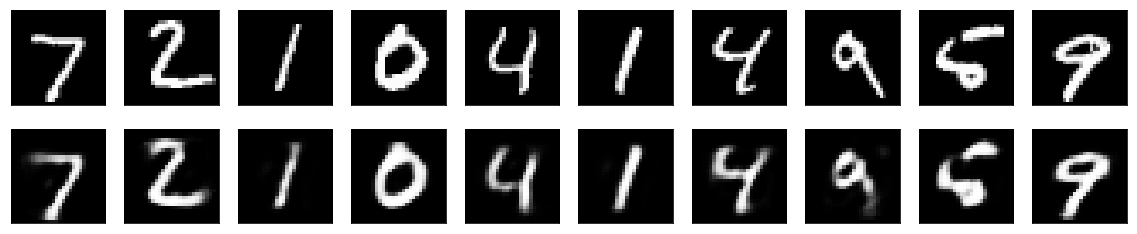

In [7]:
# 将十个样本图片可视化
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):  
    ax = plt.subplot(2, n, i + 1)  
    plt.imshow(x_test[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
  
    ax = plt.subplot(2, n, i + 1 + n)  
    plt.imshow(decoded_imgs[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
plt.show() 

### 2. 稀疏自编码器、深层自编码器

为码字加上稀疏性约束。如果我们对隐层单元施加稀疏性约束的话，会得到更为紧凑的表达，只有一小部分神经元会被激活。在Keras中，我们可以通过添加一个activity_regularizer达到对某层激活值进行约束的目的。

encoded = Dense(encoding_dim, activation='relu',activity_regularizer=regularizers.activity_l1(10e-5))(input_img)

把多个自编码器叠起来即加深自编码器的深度，50个epoch后，损失val_loss:0.0926，比1个隐含层的自编码器要好一些。

In [9]:
input_img = Input(shape=(784,))  
encoded = Dense(128, activation='relu')(input_img)  
encoded = Dense(64, activation='relu')(encoded)  
decoded_input = Dense(32, activation='relu')(encoded)  
  
decoded = Dense(64, activation='relu')(decoded_input)  
decoded = Dense(128, activation='relu')(decoded)  
decoded = Dense(784, activation='sigmoid')(encoded)  
  
autoencoder = Model(inputs=input_img, outputs=decoded)  
encoder = Model(inputs=input_img, outputs=decoded_input)  
  
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')  
  
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256,   
                shuffle=True, validation_data=(x_test, x_test))  
  
encoded_imgs = encoder.predict(x_test)  
decoded_imgs = autoencoder.predict(x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s - loss: 0.3453 - val_loss: 0.2650
Epoch 2/50
60000/60000 [==============================] - 8s - loss: 0.2539 - val_loss: 0.2390
Epoch 3/50
60000/60000 [==============================] - 9s - loss: 0.2271 - val_loss: 0.2132
Epoch 4/50
60000/60000 [==============================] - 9s - loss: 0.2052 - val_loss: 0.1952
Epoch 5/50
60000/60000 [==============================] - 8s - loss: 0.1900 - val_loss: 0.1823
Epoch 6/50
60000/60000 [==============================] - 9s - loss: 0.1790 - val_loss: 0.1730
Epoch 7/50
60000/60000 [==============================] - 9s - loss: 0.1707 - val_loss: 0.1654
Epoch 8/50
60000/60000 [==============================] - 9s - loss: 0.1632 - val_loss: 0.1583
Epoch 9/50
60000/60000 [==============================] - 9s - loss: 0.1560 - val_loss: 0.1510
Epoch 10/50
60000/60000 [==============================] - 9s - loss: 0.1493 - val_loss: 0.1448

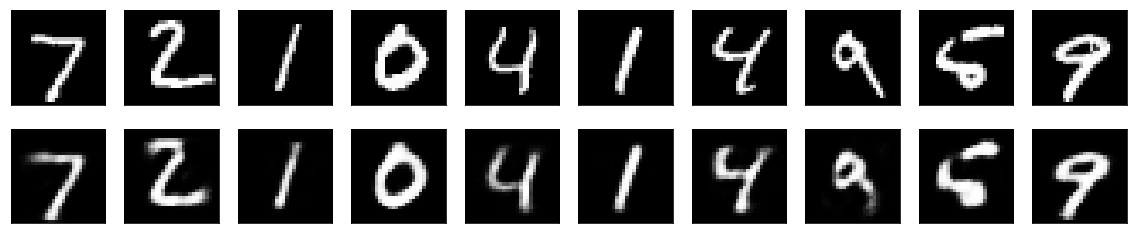

In [10]:
# 将十个样本图片可视化
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):  
    ax = plt.subplot(2, n, i + 1)  
    plt.imshow(x_test[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
  
    ax = plt.subplot(2, n, i + 1 + n)  
    plt.imshow(decoded_imgs[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
plt.show() 

### 3. 卷积自编码器：用卷积层构建自编码器
当输入是图像时，使用卷积神经网络是更好的。卷积自编码器的编码器部分由卷积层和MaxPooling层构成，MaxPooling负责空域下采样。而解码器由卷积层和上采样层构成。50个epoch后，损失val_loss: 0.1018

In [13]:
from keras.layers import Convolution2D, MaxPooling2D, UpSampling2D
from keras.callbacks import TensorBoard 

In [17]:
 (x_train, _), (x_test, _) = mnist.load_data()  
x_train = x_train.astype('float32') / 255.  
x_test = x_test.astype('float32') / 255.  
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

input_img = Input(shape=(28, 28, 1))

x = Convolution2D(16, (3, 3), activation='relu', padding='same')(input_img)  
x = MaxPooling2D((2, 2), padding='same')(x)  
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)  
x = MaxPooling2D((2, 2), padding='same')(x)  
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)  
encoded = MaxPooling2D((2, 2), padding='same')(x)  
  
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(encoded)  
x = UpSampling2D((2, 2))(x)  
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)  
x = UpSampling2D((2, 2))(x)  
x = Convolution2D(16, (3, 3), activation='relu')(x)  
x = UpSampling2D((2, 2))(x)  
decoded = Convolution2D(1, (3, 3), activation='sigmoid', padding='same')(x)  
  
autoencoder = Model(inputs=input_img, outputs=decoded)  
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')  

# 打开一个终端并启动TensorBoard，终端中输入 tensorboard --logdir=/autoencoder  
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256,  
                shuffle=True, validation_data=(x_test, x_test),  
                callbacks=[TensorBoard(log_dir='autoencoder', write_graph=False)])  

decoded_imgs = autoencoder.predict(x_test)  

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 199s - loss: 0.2648 - val_loss: 0.1931
Epoch 2/10
60000/60000 [==============================] - 195s - loss: 0.1827 - val_loss: 0.1710
Epoch 3/10
60000/60000 [==============================] - 189s - loss: 0.1671 - val_loss: 0.1586
Epoch 4/10
60000/60000 [==============================] - 191s - loss: 0.1570 - val_loss: 0.1517
Epoch 5/10
60000/60000 [==============================] - 191s - loss: 0.1497 - val_loss: 0.1457
Epoch 6/10
60000/60000 [==============================] - 190s - loss: 0.1445 - val_loss: 0.1396
Epoch 7/10
60000/60000 [==============================] - 193s - loss: 0.1405 - val_loss: 0.1366
Epoch 8/10
60000/60000 [==============================] - 192s - loss: 0.1373 - val_loss: 0.1339
Epoch 9/10
60000/60000 [==============================] - 191s - loss: 0.1349 - val_loss: 0.1324
Epoch 10/10
60000/60000 [==============================] - 192s - loss: 0.132

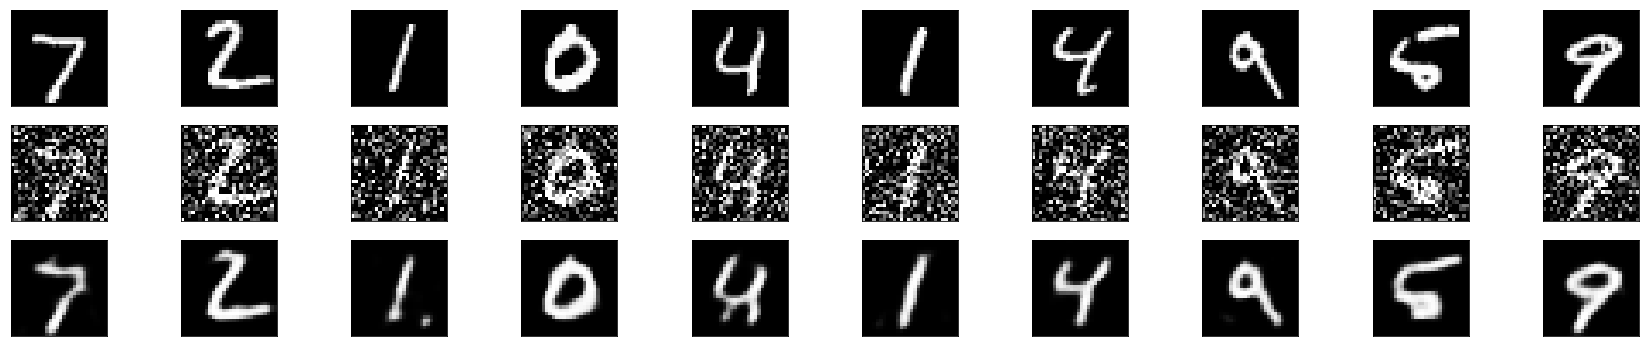

In [19]:
n = 10  
plt.figure(figsize=(30, 6))  
for i in range(n):  
    ax = plt.subplot(3, n, i + 1)  
    plt.imshow(x_test[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
      
    ax = plt.subplot(3, n, i + 1 + n)  
    plt.imshow(x_test_noisy[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
  
    ax = plt.subplot(3, n, i + 1 + 2*n)  
    plt.imshow(decoded_imgs[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
plt.show()  

### 4. 使用自动编码器进行图像去噪
我们把训练样本用噪声污染，然后使解码器解码出干净的照片，以获得去噪自动编码器。首先我们把原图片加入高斯噪声，然后把像素值clip到0~1。

In [18]:
(x_train, _), (x_test, _) = mnist.load_data()  
x_train = x_train.astype('float32') / 255.  
x_test = x_test.astype('float32') / 255.  
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  
noise_factor = 0.5  
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)   
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)   
x_train_noisy = np.clip(x_train_noisy, 0., 1.)  
x_test_noisy = np.clip(x_test_noisy, 0., 1.)  
print(x_train.shape)  
print(x_test.shape)  
  
input_img = Input(shape=(28, 28, 1))  
  
x = Convolution2D(32, (3, 3), activation='relu', padding='same')(input_img)  
x = MaxPooling2D((2, 2), padding='same')(x)  
x = Convolution2D(32, (3, 3), activation='relu', padding='same')(x)  
encoded = MaxPooling2D((2, 2), padding='same')(x)  
  
x = Convolution2D(32, (3, 3), activation='relu', padding='same')(encoded)  
x = UpSampling2D((2, 2))(x)  
x = Convolution2D(32, (3, 3), activation='relu', padding='same')(x)  
x = UpSampling2D((2, 2))(x)  
decoded = Convolution2D(1, (3, 3), activation='sigmoid', padding='same')(x)  
  
autoencoder = Model(inputs=input_img, outputs=decoded)  
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')  
  
# 打开一个终端并启动TensorBoard，终端中输入 tensorboard --logdir=/autoencoder  
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256,  
                shuffle=True, validation_data=(x_test_noisy, x_test),  
                callbacks=[TensorBoard(log_dir='autoencoder', write_graph=False)])  
  
decoded_imgs = autoencoder.predict(x_test_noisy)  

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 393s - loss: 0.2441 - val_loss: 0.1548
Epoch 2/10
60000/60000 [==============================] - 404s - loss: 0.1441 - val_loss: 0.1330
Epoch 3/10
60000/60000 [==============================] - 404s - loss: 0.1291 - val_loss: 0.1223
Epoch 4/10
60000/60000 [==============================] - 412s - loss: 0.1215 - val_loss: 0.1166
Epoch 5/10
60000/60000 [==============================] - 406s - loss: 0.1171 - val_loss: 0.1164
Epoch 6/10
60000/60000 [==============================] - 405s - loss: 0.1141 - val_loss: 0.1135
Epoch 7/10
60000/60000 [==============================] - 400s - loss: 0.1121 - val_loss: 0.1087
Epoch 8/10
60000/60000 [==============================] - 402s - loss: 0.1101 - val_loss: 0.1069
Epoch 9/10
60000/60000 [==============================] - 402s - loss: 0.1088 - val_loss: 0.1060
Epoch 10/10
60000/60000 [==============

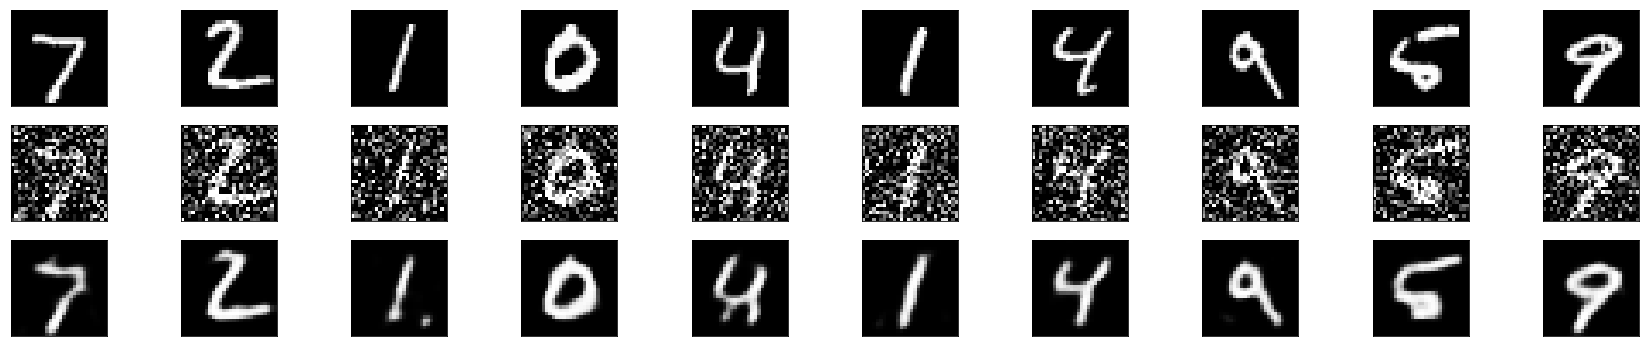

In [20]:
n = 10  
plt.figure(figsize=(30, 6))  
for i in range(n):  
    ax = plt.subplot(3, n, i + 1)  
    plt.imshow(x_test[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
      
    ax = plt.subplot(3, n, i + 1 + n)  
    plt.imshow(x_test_noisy[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
  
    ax = plt.subplot(3, n, i + 1 + 2*n)  
    plt.imshow(decoded_imgs[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
plt.show()  